
Title: "Online Shopping data cleaning and interpolation" 
Author : "Gabriel E Mancillas Gallardo
date: "2023-12-08" 


Here is a rundown of what my portion of work might include: 

Understanding the Dataset:
Familiarize yourself with the dataset by identifying the number of features (columns), records (rows), and the type of data (numerical, categorical, boolean).
Determine the significance of each feature and its potential role in any analysis or predictive modeling.

Data Importing:
Import the dataset into an appropriate data analysis tool (like Python with pandas, R, etc.).
Verify that the data has been imported correctly by checking for any discrepancies in the number of rows and columns.

Data Cleaning:
Check for and handle missing values, even though initial inspection suggests there are none. Sometimes missing values are hidden as placeholders (like zeros, negative values, or strings such as 'unknown', 'n/a').
Detect and correct errors or inconsistencies in data, such as typos, incorrect entries, or mislabeled classes.
Remove duplicate records to prevent skewed analysis.

Data Transformation:
Normalize or scale numerical features to ensure that no variable dominates others because of its scale, which is important for models like k-nearest neighbors (KNN) or gradient descent-based algorithms.
Encode categorical variables using techniques like one-hot encoding or label encoding, so that they can be used in mathematical models.
Aggregate data if needed, for instance, summarizing daily data into monthly data if the analysis calls for it.

Feature Engineering:
Create new features that could be important for the analysis or predictive modeling. For instance, from the Month column, you could derive a feature that represents the season.
Discretize continuous features if it makes sense for the analysis. For example, you could categorize Age into groups like 'Young', 'Middle-Aged', and 'Senior'.

Data Reduction:
Reduce dimensionality if the dataset is very large or contains many features that are not contributing to the analysis. Techniques like Principal Component Analysis (PCA) can be useful here.
Perform feature selection to keep the most relevant features, which could involve domain knowledge, statistical tests, or model-based selection.

Ensuring Data Quality:
Validate the quality of the data to ensure accuracy, completeness, and reliability.
Document any assumptions or decisions made during the pre-processing steps.



In [128]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

working_directory = os.getcwd()
print(working_directory)

path = working_directory + '/online_shoppers_intentions.csv' 
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intentions.csv'))

data = pd.read_csv(path) 

/Users/gabrielmancillas


In [129]:
data_info = data.info()
data_head = data.head()
data_describe = data.describe()
data_nunique = data.nunique

data_info, data_head, data_describe,data_nunique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

(None,
    Administrative  Administrative_Duration  Informational  \
 0               0                      0.0            0.0   
 1               0                      0.0            0.0   
 2               0                      0.0            0.0   
 3               0                      0.0            0.0   
 4               0                      0.0            0.0   
 
    Informational_Duration  ProductRelated  ProductRelated_Duration  \
 0                     0.0               1                 0.000000   
 1                     0.0               2                64.000000   
 2                     0.0               1                 0.000000   
 3                     0.0               2                 2.666667   
 4                     0.0              10               627.500000   
 
    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
 0         0.20       0.20         0.0         0.0   Feb               1.0   
 1         0.00       0.10         

DataFrame Information:

The dataset is contained in a DataFrame, which is a tabular data structure with labeled axes (rows and columns).
It has 12,330 entries (rows) and 18 columns.
Each column's name, number of non-null values, and data type (int64, float64, bool, object) are listed.
There's a usage of 1.4+ MB memory by this DataFrame.
First Few Rows (Head of the DataFrame):

The head() method output shows the first five rows of the DataFrame.
Columns include various numerical and categorical features such as Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, and Revenue.
Descriptive Statistics:

The describe() method provides a statistical summary of the numerical columns. This includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for columns like Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, and PageValues.
Unique Value Counts:

The nunique() method shows the count of unique values for each column, which helps to understand the distribution of categorical data.
For example, it shows how many different types of browsers or operating systems are represented in the dataset.

In [68]:
# Checking for number of unique values for each feature
uniques_alternative = {column: data[column].nunique() for column in data.columns}
uniques_alternative

{'Administrative': 27,
 'Administrative_Duration': 3335,
 'Informational': 17,
 'Informational_Duration': 1258,
 'ProductRelated': 311,
 'ProductRelated_Duration': 9551,
 'BounceRates': 1872,
 'ExitRates': 4777,
 'PageValues': 2681,
 'SpecialDay': 6,
 'OperatingSystems': 8,
 'Browser': 13,
 'Region': 9,
 'TrafficType': 20,
 'VisitorType': 3,
 'Weekend': 2,
 'Revenue': 2}

--
Tranform data appropriately using techniques such as aggregation, normalization, and feature constructions. 
--

---
Aggregation
---


In [126]:
import pandas as pd 

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)


In [127]:

aggregated_data = shoppers_data.groupby('VisitorType')['Administrative_Duration'].mean().reset_index()

aggregated_data

,VisitorType,Administrative_Duration
0,New_Visitor,91.911315
1,Other,62.695588
2,Returning_Visitor,79.183639


---
Normalization
---

In [78]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.9 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 39.8 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 44.1 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [79]:
!conda update scikit-learn

Retrieving notices: ...working... done

PackageNotInstalledError: Package is not installed in prefix.
  prefix: /Users/gabrielmancillas/opt/miniconda3
  package name: scikit-learn




In [123]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)


In [124]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
scaler = MinMaxScaler()


numerical_cols = shoppers_data.select_dtypes(include=['int64', 'float64']).columns
shoppers_data['Administrative_Duration'] = scaler.fit_transform(shoppers_data[['Administrative_Duration']])
print(shoppers_data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0            0.0   
1               0                      0.0            0.0   
2               0                      0.0            0.0   
3               0                      0.0            0.0   
4               0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb               1.0   
1         0.00       0.10         0.0         0.0   Feb   

In order to improved future model performance: by normalizing data is a standard pre-processing step before running manchine learning algorithms. this ensures that each feature contributes equally to the analysis, which can improve the perforamnce of models that are sensitive to the scale of the data. 

- one factor is to remove outliers:
      - outliers can disproportionately influence the model's loss, in regression problems
      - use statisitcal methods like OQR to detect and remove outliers
- Second factor is to removing missing values
      - depening on the context, yyou might fill in missin values with the mean/median or predict them with a model;
      - or you might drop features or observation where missing values are too prevalent.
  

In [125]:
import pandas as pd
import numpy as np

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)

Q1 = shoppers_data['Administrative_Duration'].quantile(0.25)
Q3 = shoppers_data['Administrative_Duration'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = shoppers_data[(shoppers_data['Administrative_Duration'] < lower_bound) | 
                         (shoppers_data['Administrative_Duration'] > upper_bound)]

print(outliers['Administrative_Duration'])

62        279.416667
76       1005.666667
109       326.250000
128       462.000000
187       293.778205
            ...     
12247     311.136111
12260     262.666667
12265     413.499612
12285     369.333333
12307     305.125000
Name: Administrative_Duration, Length: 1172, dtype: float64


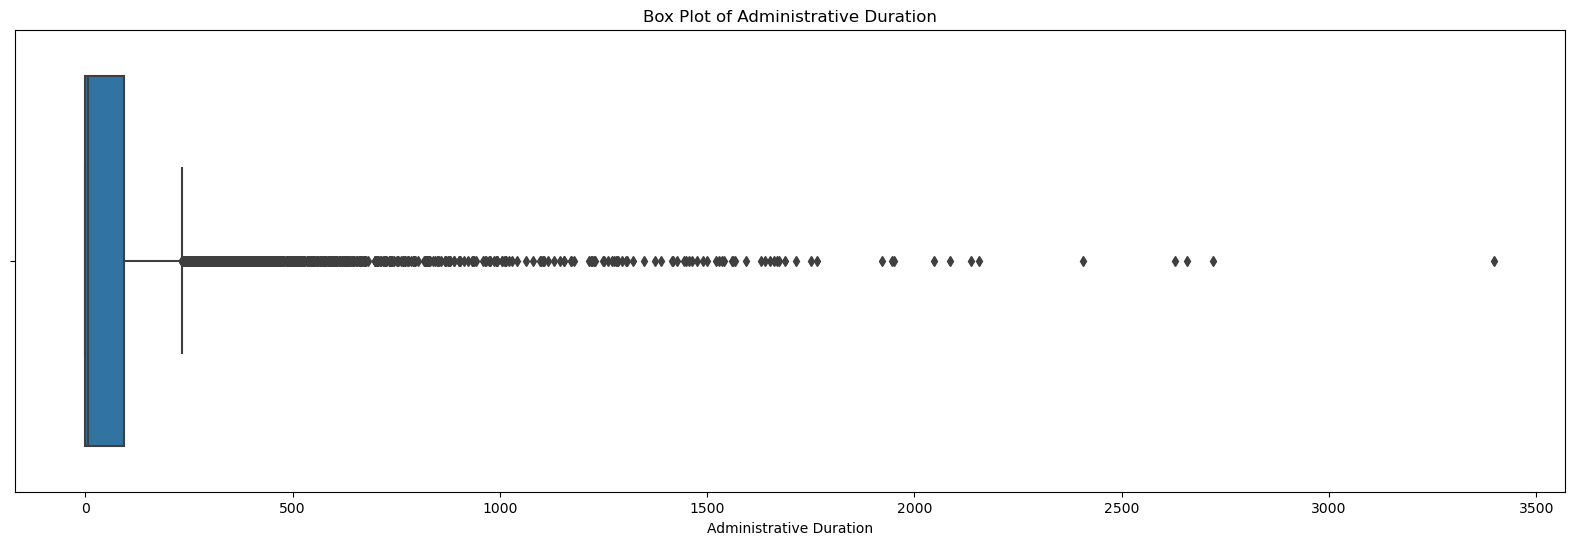

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)

plt.figure(figsize=(20, 6))
sns.boxplot(x=shoppers_data['Administrative_Duration'])
plt.title('Box Plot of Administrative Duration')
plt.xlabel('Administrative Duration')


plt.show()

The points outside the whiskers are considered outliers. They are data points that lie beyond 1.5 times the IQR from the quartiles and are typically considered extreme or anomalous values within this dataset.

On the next dataset we will be presenting every numerical column, which can help in identifying outliers across all the numerical features of our dataset. 

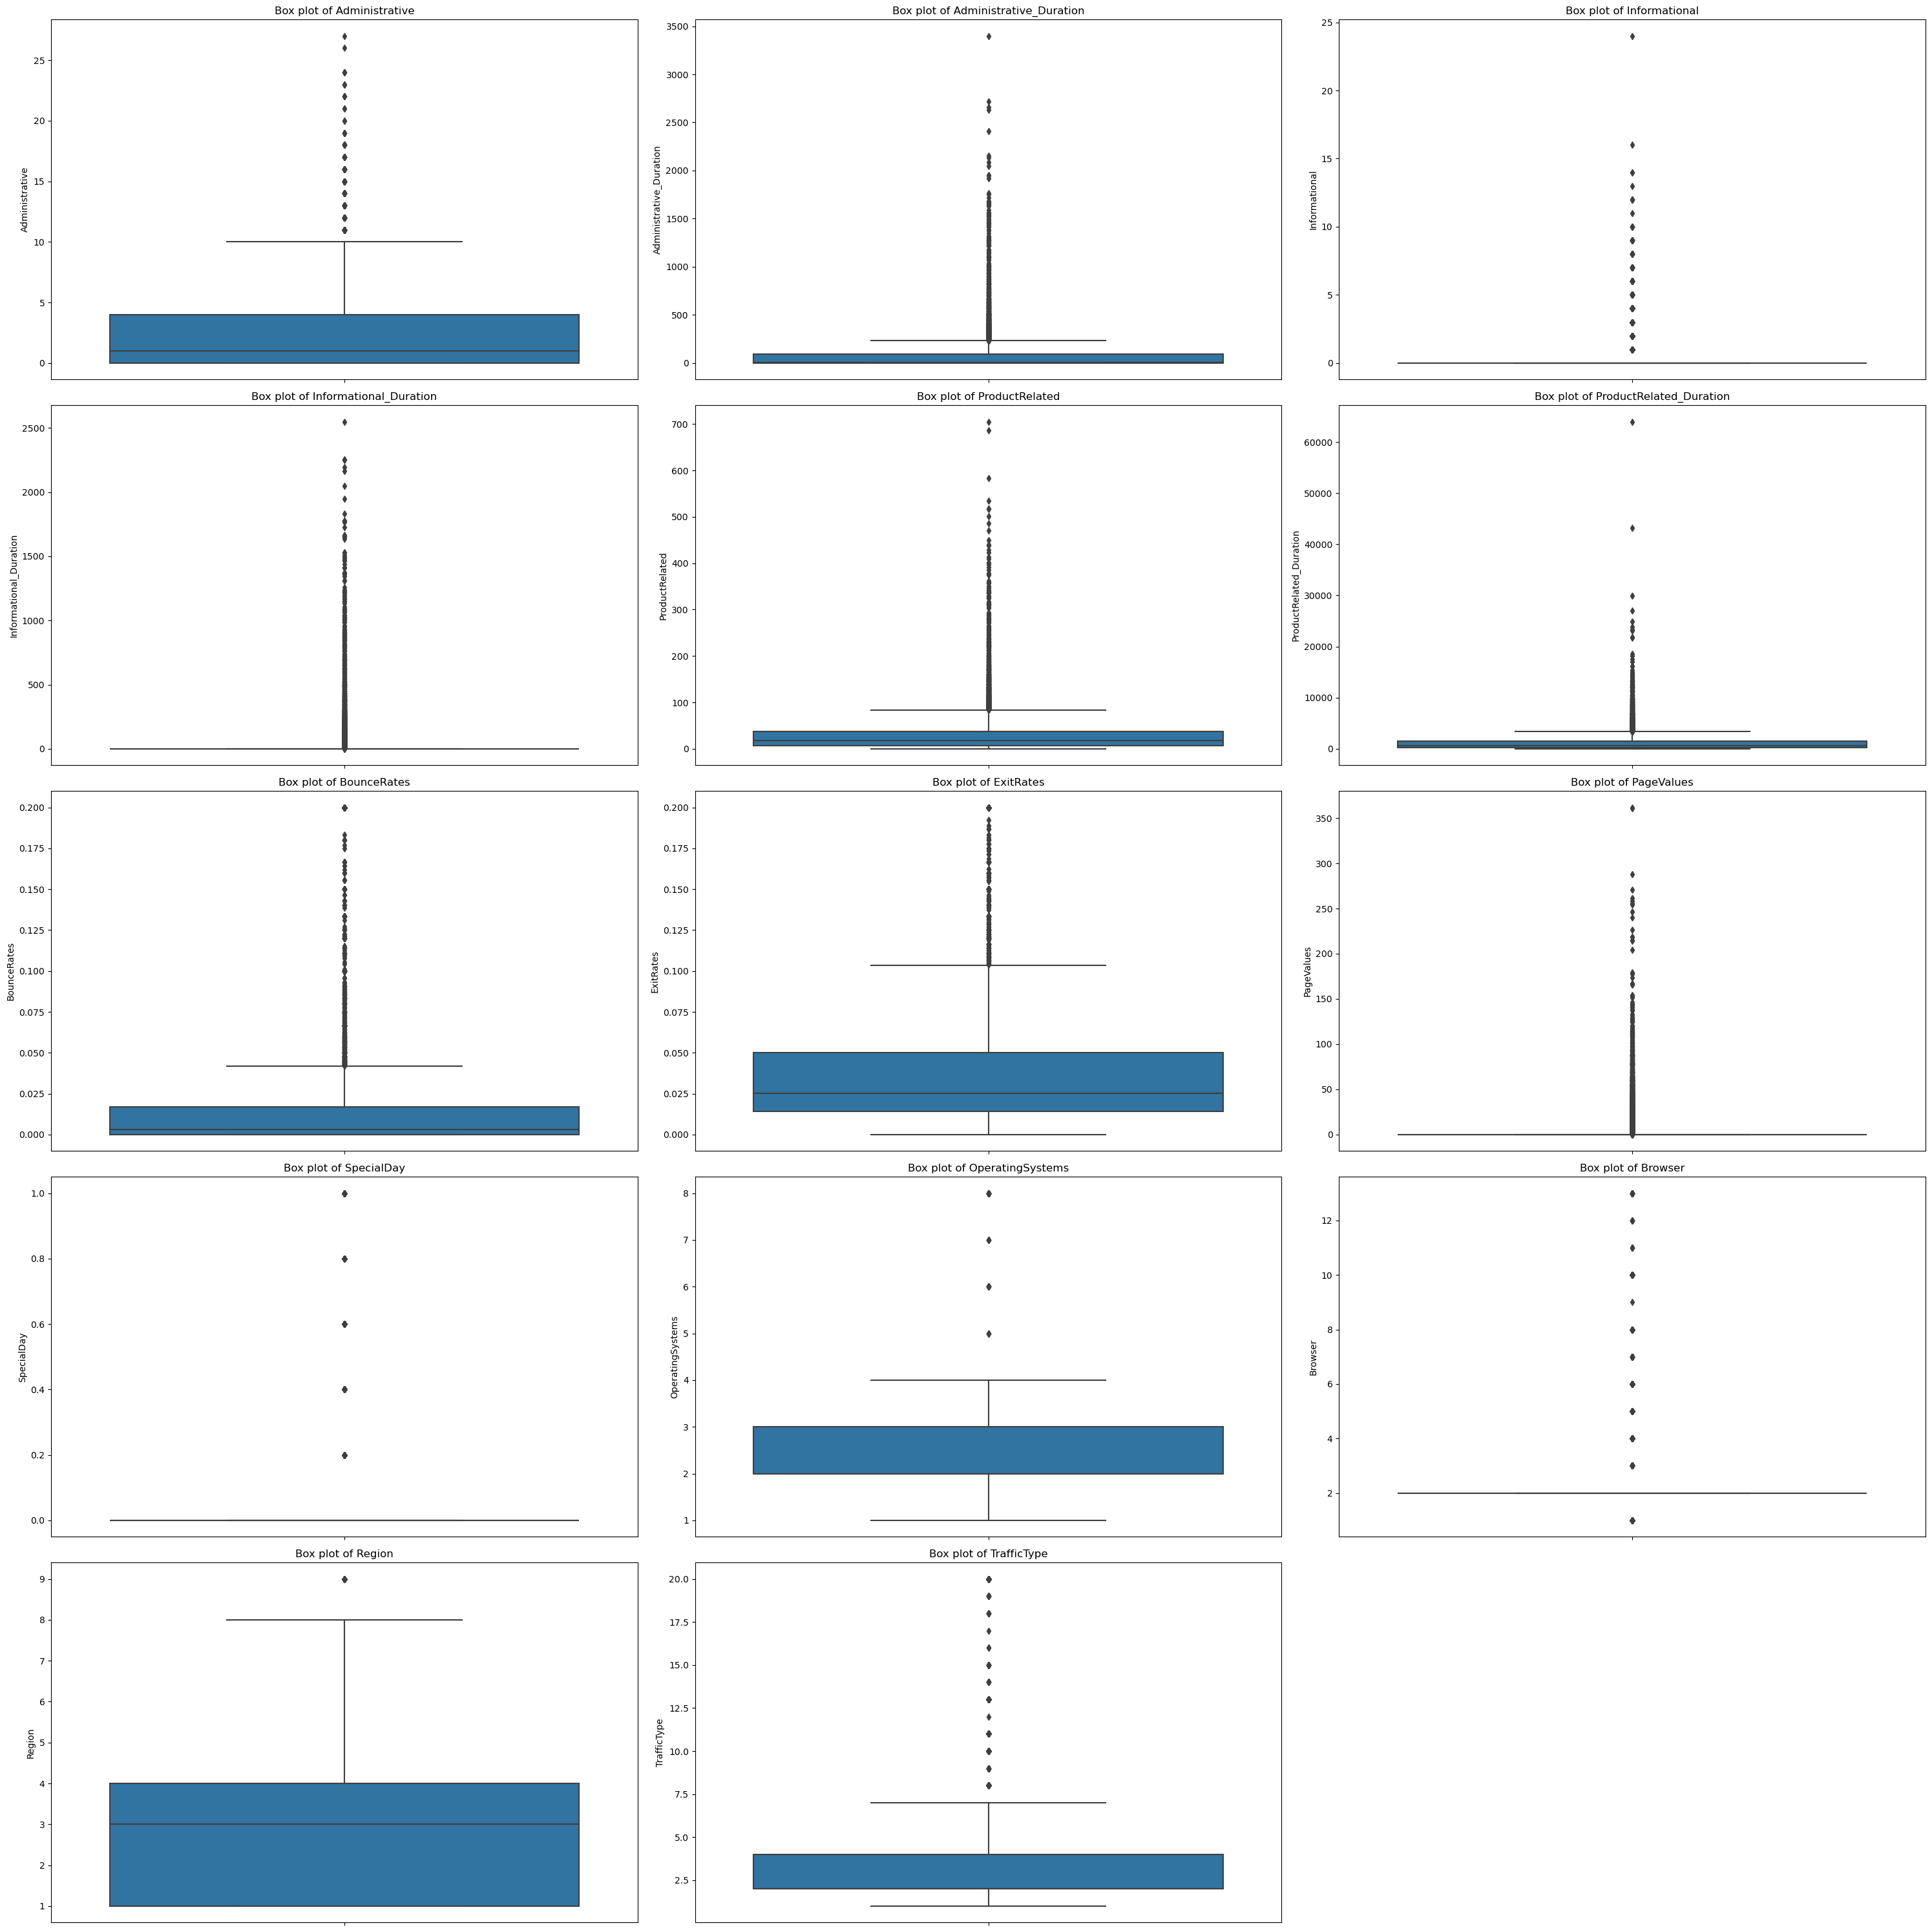

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)


numerical_cols = shoppers_data.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(30, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=shoppers_data[col])
    plt.title(f'Box plot of {col}')
    plt.tight_layout()

plt.show()

---
Feature Construction
---

In [118]:
import pandas as pd

file_path = 'online_shoppers_intention.csv' 
shoppers_data = pd.read_csv(file_path)


shoppers_data['Total_Duration'] = (
    shoppers_data['Administrative_Duration'] +
    shoppers_data['Informational_Duration'] +
    shoppers_data['ProductRelated_Duration']
)

duration_cols = [col for col in shoppers_data.columns if 'Duration' in col]
shoppers_data['Total_Duration'] = shoppers_data[duration_cols].sum(axis=1)

print(shoppers_data[['Total_Duration']].head())

print(shoppers_data[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'Total_Duration']].head())


   Total_Duration
0        0.000000
1      128.000000
2        0.000000
3        5.333333
4     1255.000000
   Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   Total_Duration  
0        0.000000  
1      128.000000  
2        0.000000  
3        5.333333  
4     1255.000000  


---
Machine learning - final clean model
---

In [117]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)
le = LabelEncoder()


shoppers_data['VisitorType'] = le.fit_transform(shoppers_data['VisitorType'])
shoppers_data['Month'] = le.fit_transform(shoppers_data['Month'])
shoppers_data['Weekend'] = le.fit_transform(shoppers_data['Weekend'])
shoppers_data['Revenue'] = le.fit_transform(shoppers_data['Revenue'])

print(shoppers_data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0            0.0   
1               0                      0.0            0.0   
2               0                      0.0            0.0   
3               0                      0.0            0.0   
4               0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2               1.0   
1         0.00       0.10         0.0         0.0      2

In [150]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = 'online_shoppers_intentions.csv' 
shoppers_data = pd.read_csv(file_path)

for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])


    if data[column].isnull().any():
        data[column].fillna(data[column].mode()[0], inplace=True)


X = data.drop('Revenue', axis=1)
y = data['Revenue']

if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

rfc.fit(X_train, y_train)


y_pred_rfc = rfc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred_rfc)
print(f'Random Forest Classifier model accuracy (in %): {accuracy * 100:.2f}')

Random Forest Classifier model accuracy (in %): 90.75


The area under the ROC curve is: 0.93


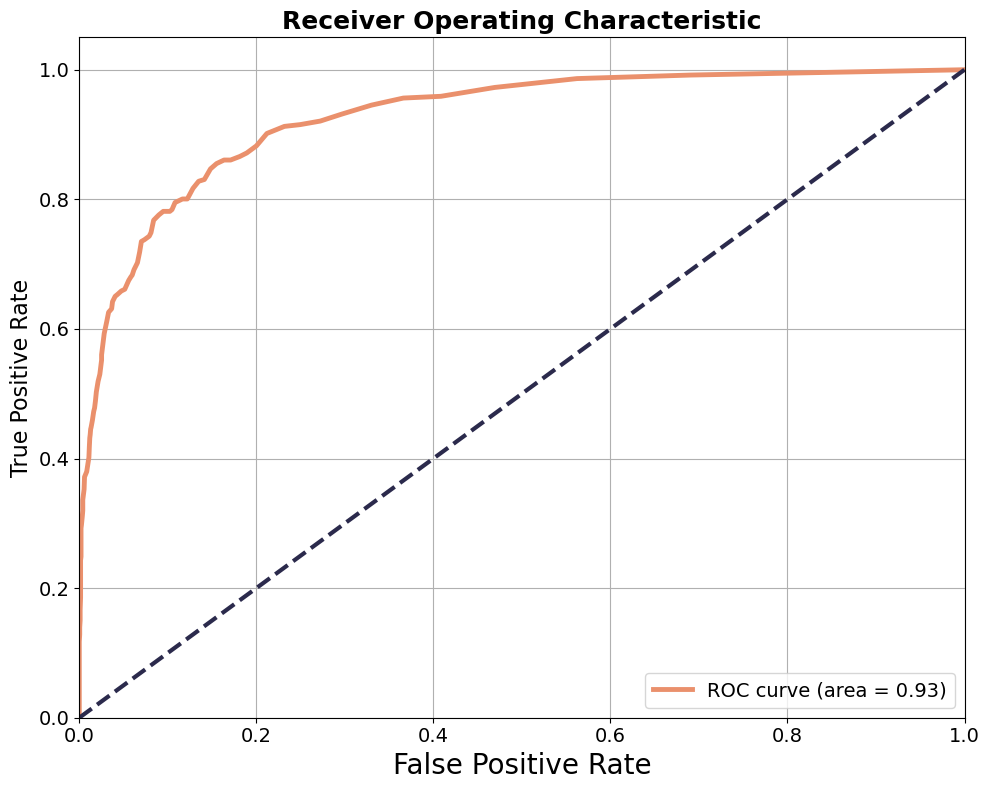

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_probs = classifier.predict_proba(X_test)[:, 1]

roc_value = metrics.roc_auc_score(y_test, y_probs)
print(f'The area under the ROC curve is: {roc_value:.2f}')

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10, 8))  
plt.title('Receiver Operating Characteristic', fontsize=18, weight='bold')
plt.plot(fpr, tpr, color='#EA906C', lw=3.5, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#2B2A4C', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)  
plt.legend(loc="lower right", fontsize=14)
plt.tight_layout()  
plt.show()

The image you've provided seems to show a Receiver Operating Characteristic (ROC) curve, which is a graphical representation used to evaluate the performance of a binary classification model. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

True Positive Rate (TPR) is also known as recall and is calculated as:
TPR = True Positives / True Positives + False Negatives

False Positive Rate (FPR) is calculated as: 

FPR= 
False Positives / True Negatives + False Positives
​
- The dotted line represents the performance of a random classifier; a good model stays as far away from this line as possible (toward the top-left corner
 
- The area under the ROC curve (AUC) is a single scalar value summarizing the overall performance of the classifier. The AUC value ranges from 0 to 1, where 1 indicates a perfect model and 0.5 indicates a model that performs no better than random chance.
In your case, the AUC is 0.90, which suggests that the model has a high ability to distinguish between the positive class and the negative class.

- Implications for the data:

The model being used, which seems to be a Random Forest Classifier, is performing well in distinguishing between the two classes of the target variable.
An AUC of 0.90 means that there is a 90% chance that the model will be able to distinguish between a randomly chosen positive instance and a negative one.



--- 
Clean Data
---

In [152]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

working_directory = os.getcwd()
print(working_directory)

/Users/gabrielmancillas


In [153]:
path = working_directory + '/online_shoppers_intention1.csv' 
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

data = pd.read_csv(path) 

In [154]:
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [155]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [156]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [157]:
data.duplicated().sum()

121

In [158]:
data = data.drop_duplicates()

In [159]:
data.duplicated().sum()

0

In [160]:
data_cleaned = data.drop_duplicates()

# Confirm no duplicates are present
duplicates_count = data_cleaned.duplicated().sum()
duplicates_count

0

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11827 entries, 0 to 11947
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11827 non-null  int64  
 1   Administrative_Duration  11827 non-null  float64
 2   Informational            11827 non-null  int64  
 3   Informational_Duration   11827 non-null  float64
 4   ProductRelated           11827 non-null  int64  
 5   ProductRelated_Duration  11827 non-null  float64
 6   BounceRates              11827 non-null  float64
 7   ExitRates                11827 non-null  float64
 8   PageValues               11827 non-null  float64
 9   SpecialDay               11827 non-null  float64
 10  Month                    11827 non-null  object 
 11  OperatingSystems         11827 non-null  int64  
 12  Browser                  11827 non-null  int64  
 13  Region                   11827 non-null  int64  
 14  TrafficType              11

In [162]:
encode = {'VisitorType'}
dict_visitor = {'VisitorType' : 'Encode'}
data_enc = data
for i in encode:
  enc = (data_enc.groupby(i).size()) * 100/ len(data)
  dict_visitor[data_enc.groupby(i)] = enc
  enc_name = str(i+'_enc')
  data_enc[enc_name] = data_enc[i].apply(lambda x : enc[x])
  data_enc = data_enc.drop(columns = [i])

In [163]:
dict_visitor

{'VisitorType': 'Encode',
 <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1523f13d0>: VisitorType
 New_Visitor          13.891942
 Other                 0.676418
 Returning_Visitor    85.431639
 dtype: float64}

Analysis on this code: 

Our analysis indicates that a significant majority, approximately 85.4%, of our website traffic comes from returning visitors. This suggests strong customer loyalty, as a high number of users are repeatedly engaging with our platform. New visitors account for about 13.9%, indicating a healthy influx of potential new customers. A very small fraction, roughly 0.67%, falls into other categories, which could include users that we have less information about.

We've transformed this information into a more usable format that feeds into our analytical models. This helps us predict shopping patterns and tailor our marketing strategies effectively. By understanding these patterns, we can focus our efforts on converting new visitors to returning ones, and target our loyal customers with offers and products that match their interests, ultimately driving sales growth

In [164]:
data_enc = data.copy()

data_enc['Weekend'] = data_enc['Weekend'].astype(int)
data_enc['Month'] = pd.to_datetime(data_enc['Month'], format='%b', errors='coerce').dt.month

if data_enc['Month'].isnull().any():
    print("There were errors parsing the Month column")

data_enc.head()

There were errors parsing the Month column


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisitorType_enc
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,Returning_Visitor,0,False,85.431639
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,Returning_Visitor,0,False,85.431639
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,Returning_Visitor,0,False,85.431639
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,Returning_Visitor,0,False,85.431639
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,Returning_Visitor,1,False,85.431639


We have simplified the 'Weekend' column, which identifies whether a website visit occurred on a weekend or weekday, into a format that our analytical models more easily interpret. We now use '1' to indicate weekends and '0' for weekdays.

Furthermore, we've transformed the 'Month' column from textual to numerical representation, aligning it with quantitative analysis needs and ensuring seamless integration with our data processing systems. For example, 'January' is converted to '1', 'February' to '2', and so on. We've implemented rigorous checks to validate the conversion integrity during this transition. Nonetheless, our system has detected certain irregularities in the 'Month' data. We are committed to conducting a thorough investigation to address and correct these issues, reaffirming our commitment to data accuracy.

This meticulous work results in a clean, well-structured dataset that we can use to predict trends, customer preferences, and, potentially, revenue opportunities. This enhances our ability to make strategic decisions based on solid data analysis.

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load the dataset
path = working_directory + '/online_shoppers_intention1.csv' 
data = pd.read_csv(os.path.join(os.getcwd(),'online_shoppers_intention1.csv'))

data = pd.read_csv(path) 


In [193]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Month_encoded'] = le.fit_transform(data['Month'])
data['VisitorType_encoded'] = le.fit_transform(data['VisitorType'])

In [194]:
data = pd.get_dummies(data, columns=['Month', 'VisitorType'])

In [195]:

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()), axis=0)

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

The area under the ROC curve is: 0.90


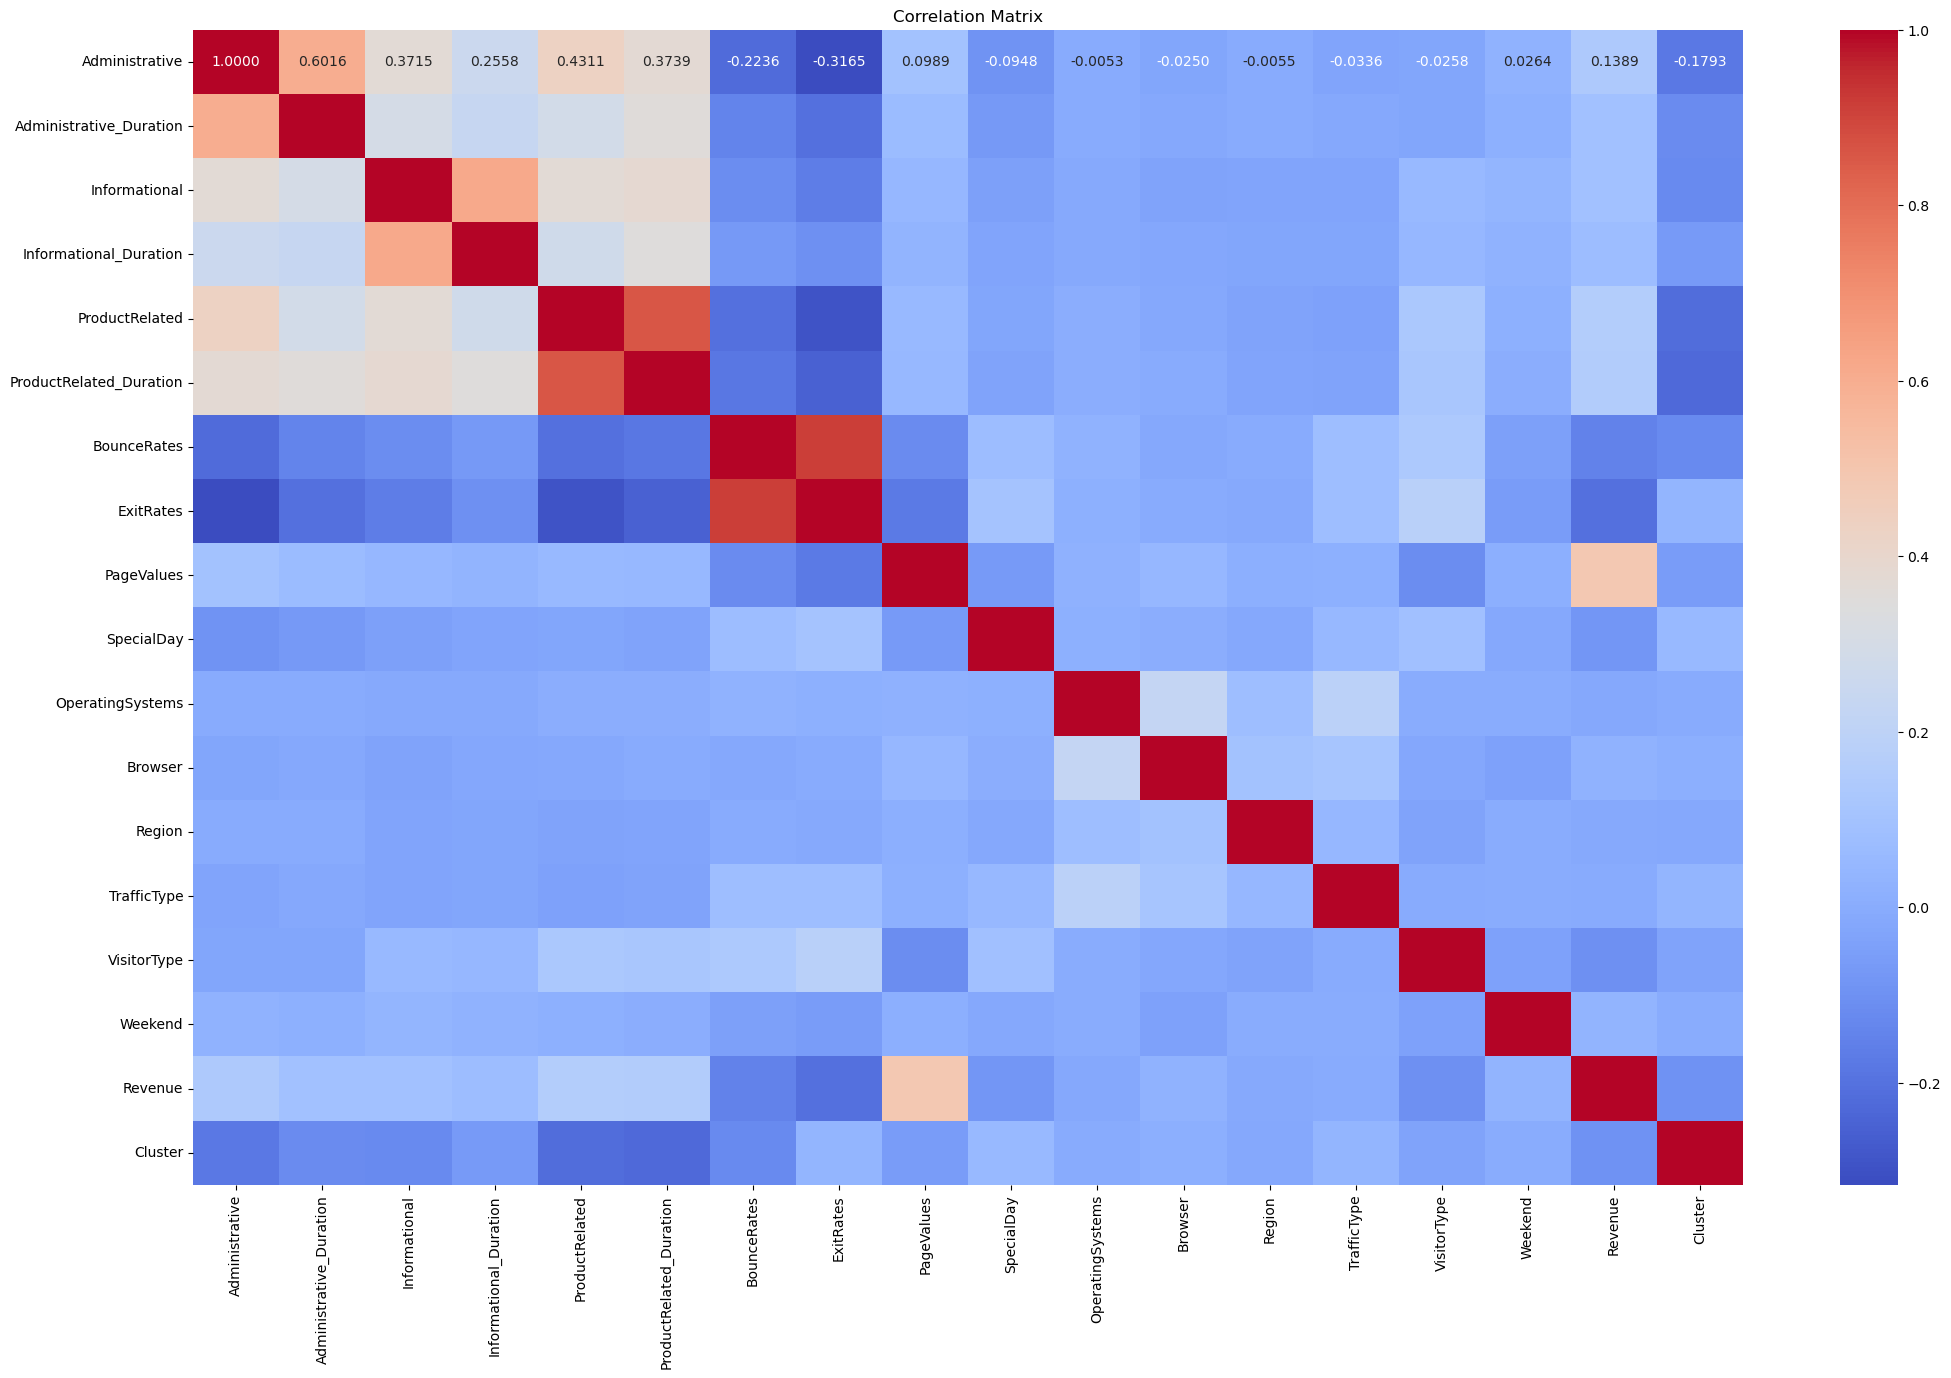

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'online_shoppers_intention.csv' 
data = pd.read_csv(file_path)

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('Revenue', axis=1)  
y = data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

y_probs = classifier.predict_proba(X_test)[:, 1]
roc_value = metrics.roc_auc_score(y_test, y_probs)
print(f"The area under the ROC curve is: {roc_value:.2f}")

correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Matrix')
plt.show()